In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ilha\AppData\Local\Temp\ipykernel_11244\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Carregar arquivo para um DF
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [4]:
# Visualizar DF
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [5]:
# Apresentar as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [6]:
# Verificar se as informações de genero contém apenas M e F
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [7]:
# Remover coluna id_paciente, é um dado que não nos fornece uma informação util, então vamos remover
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [8]:
# Converter uma variável categórica (genero) em numerica, usando One-Hot-Encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [9]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

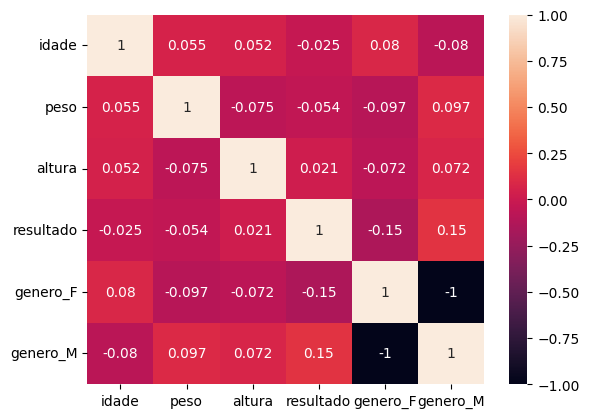

In [11]:
# Apresentar Mapa de Calor com Correlação entre as variáveis de calor
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

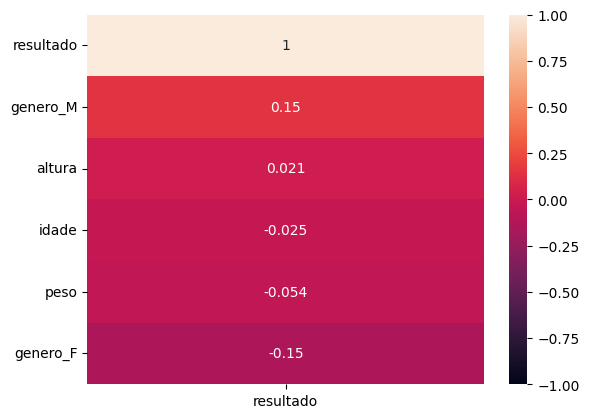

In [12]:
# Mapa de correção só com a variavel target
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

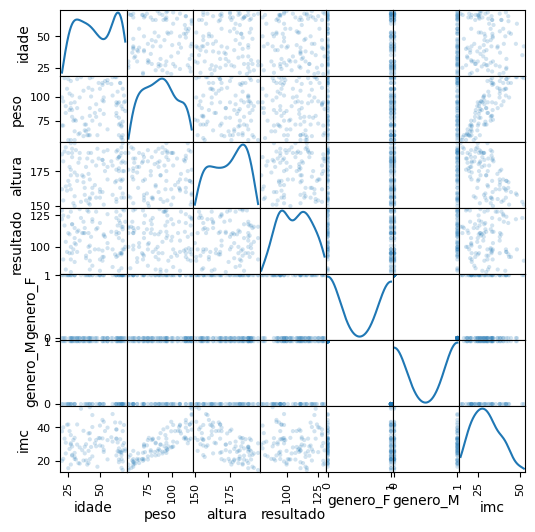

In [18]:
# Plot de Scatter (dispersão) com distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

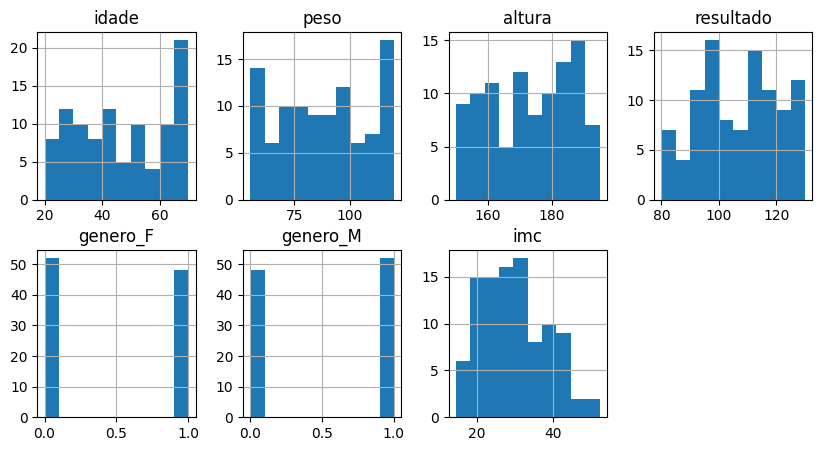

In [19]:
# histograma de todas as variáveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [16]:
# Criar uma feature nova
# IMC = peso / altura^2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))

In [17]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [21]:
# Modelo 1 - SEM IMC
x = df_exames.drop(columns=['imc', 'resultado'])
# O que a gente quer prever
y = df_exames['resultado']

In [22]:
# Dividir conjunto entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

In [23]:
len(x_train), len(x_test), len(y_train), len(y_test)

(70, 30, 70, 30)

In [24]:
# Encontrar um padrão para que com esse padrão eu consiga generalizar e fazer predições em dados que eu ainda não vi
# Treinar o algoritmo de regressão linear - Modelo 1
model_1 = LinearRegression().fit(x_train, y_train)

In [25]:
# Gerar predições do conjunto de testes com base no Modelo 1
y_pred = model_1.predict(x_test)

In [26]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [27]:
# R2 Score
model_1.score(x_train, y_train)

0.06218388634297267

In [28]:
# R2 Score - Conjunto de Teste
model_1.score(x_test, y_test)

-0.1364090447910642

In [29]:
# R2 Score - Testes
r2_score(y_test, y_pred)

-0.1364090447910642

In [30]:
# MAE(Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.695569181179541

In [31]:
# Modelo 2 - APENAS COM IMC
# Transformar uma regrassão linear multipla para simples usando apenas o IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [37]:
# Dividir conjunto entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [38]:
# Treinar o algoritmo de regressão linear - Modelo 2
model_2 = LinearRegression().fit(x_train, y_train)

In [39]:
# Gerar predições do conjunto de testes com base no Modelo 2
y_pred = model_2.predict(x_test)

In [40]:
# R2 Score - Conjunto de Treinamento
model_2.score(x_train, y_train)

0.015285962664806862

In [41]:
# R2 Score - Conjunto de Teste
model_2.score(x_test, y_test)

-0.08898328562401758

In [42]:
# R2 Score - Testes
r2_score(y_test, y_pred)

-0.08898328562401758

In [43]:
# MAE(Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.5056514070601

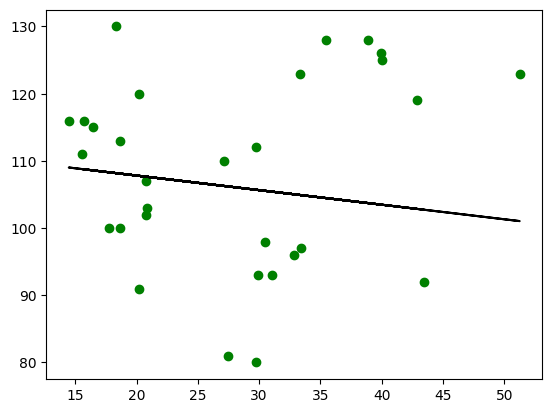

In [45]:
# Mostar como a reta foi calculada
plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, y_pred, color='k')